# Correção de sombras

## *Leonardo Sales Araujo*
### *PEMM/COPPE - Universidade Federal do Rio de Janeiro*

### A primeira parte consiste em carregar os módulos necessários

In [1]:
#carrega os módulos necessários ao código
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

### Carrega-se a imagem original e coleta os dados de cada cor

In [2]:
#carrega a imagem do subdiretorio "img"
imagem = cv2.imread('img/im_ex_01.jpg')
#o python carrega a imagem em BGR e deve ser convertida para RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

#alternativamente, pode-se carregar a imagem com matplotlib
#imagem = plt.imread('img/im_ex_B_HRI.jpg')

vermelho=imagem[:,:,0]
verde=imagem[:,:,1]
azul=imagem[:,:,2]

### representa a figura e seus canais de cores

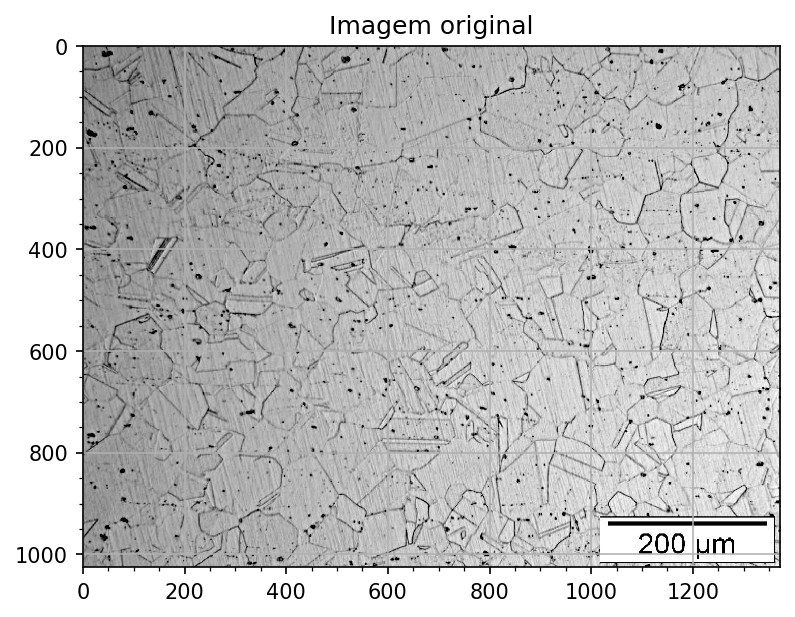

In [3]:
#mostra a figura
plt.figure(1, figsize=(6,6),dpi=150)
plt.title('Imagem original')
plt.imshow(imagem)
#plt.xlim(3600,3800)
#plt.ylim(1800,2000)
plt.minorticks_on()
plt.grid(alpha=0.95,linestyle='-')
plt.show()

### Converte a imagem em tons de cinza

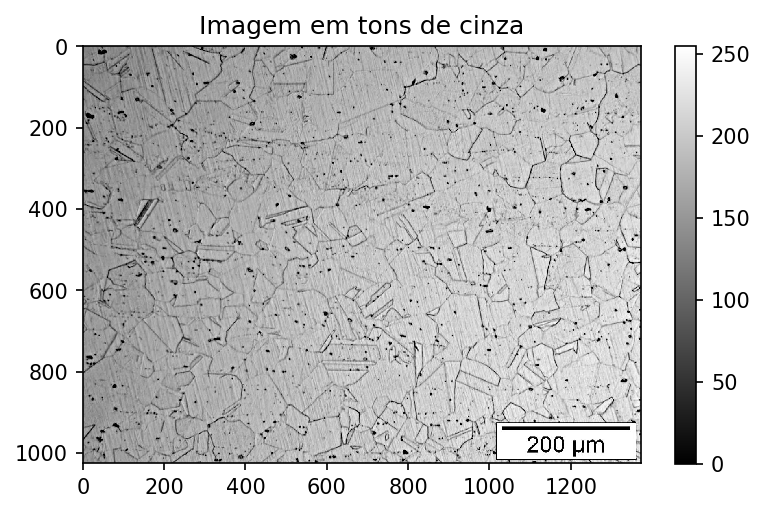

In [4]:
#carrega a imagem já em tons de cinza
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
#mostra a figura
plt.figure(2, figsize=(6,6),dpi=150)
plt.title('Imagem em tons de cinza')
plt.imshow(cinza, cmap='gray',vmin=0, vmax=255)
plt.colorbar(shrink=0.615)
plt.show()

### Apresenta o histograma da imagem

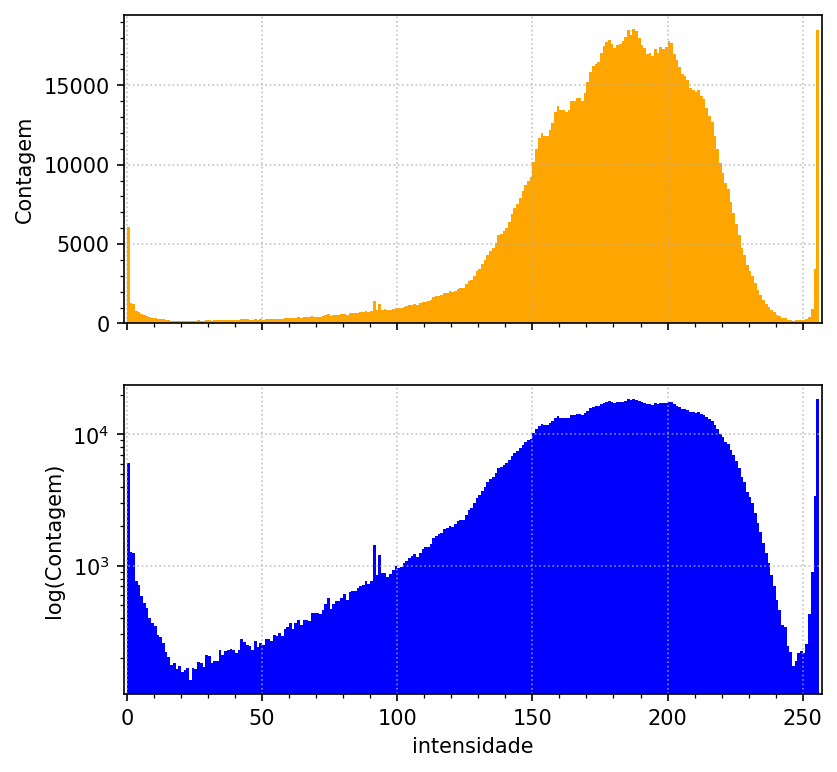

In [5]:
#mostra o histograma normal e log
plt.figure(3, figsize=(6, 6), dpi=150)
#hostograma normal
plt.subplot(211)
plt.hist(cinza.ravel(),256,[0,256],color = 'orange')
plt.xlim(-1, 257)
plt.ylabel('Contagem')
plt.minorticks_on()
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.grid(alpha=0.75,linestyle=':')

#histograma log
plt.subplot(212)
plt.hist(cinza.ravel(),256,[0,256],color = 'blue')
plt.yscale('log')
plt.xlim(-1, 257)
plt.ylabel('log(Contagem)')
plt.xlabel('intensidade')
plt.minorticks_on()
plt.grid(alpha=0.75,linestyle=':')
plt.show()

### Cria uma imagem com as linhas representando os pontos de coleta do "line profile"

Obs: a imagem aparecerá em separado pois foi construída com o Opencv

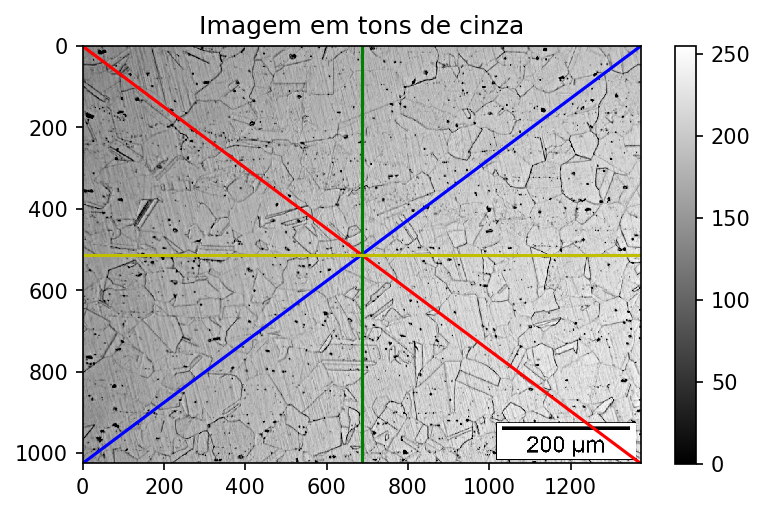

In [6]:
from skimage import draw
#coleta as dimensoes da imagem em escala
xdim=len(cinza[0,:])
ydim=len(cinza[:,0])
se=(0,0);ie=(ydim,0);sd=(0,xdim);id=(ydim,xdim)

#plot a figura com as linhas de referencia
plt.figure(4, figsize=(6,6),dpi=150)
plt.title('Imagem em tons de cinza')
plt.imshow(cinza, cmap='gray',vmin=0, vmax=255)
plt.colorbar(orientation='vertical',shrink=0.615)
plt.plot([0,xdim],[0,ydim],"r-")
plt.plot([xdim,0],[0,ydim],"b-")
plt.plot([int(xdim/2),int(xdim/2)],[0,ydim],"g-")
plt.plot([0,xdim],[int(ydim/2),int(ydim/2)],"y-")
plt.xlim(0,xdim)
plt.ylim(ydim,0)
plt.show()

### Obtém os dados do _line profile_

In [7]:
#para isso foi carregado o pacote abaixo
from skimage.measure import profile_line

#estabelece as linhas
lzl1 = profile_line(cinza,ie, sd,linewidth=1,order=0,mode='wrap') #linha azul
lzl2 = profile_line(cinza,se, id,linewidth=1,order=0,mode='wrap') #linha vermelha
lzl3 = profile_line(cinza,(0,int(ydim/2)), (xdim,int(ydim/2)),linewidth=1,order=0,mode='wrap') #linha horizontal
lzl4 = profile_line(cinza,(int(xdim/2),0), (int(xdim/2),ydim),linewidth=1,order=0,mode='wrap') #linha vertical

### Faz os perfis de linha

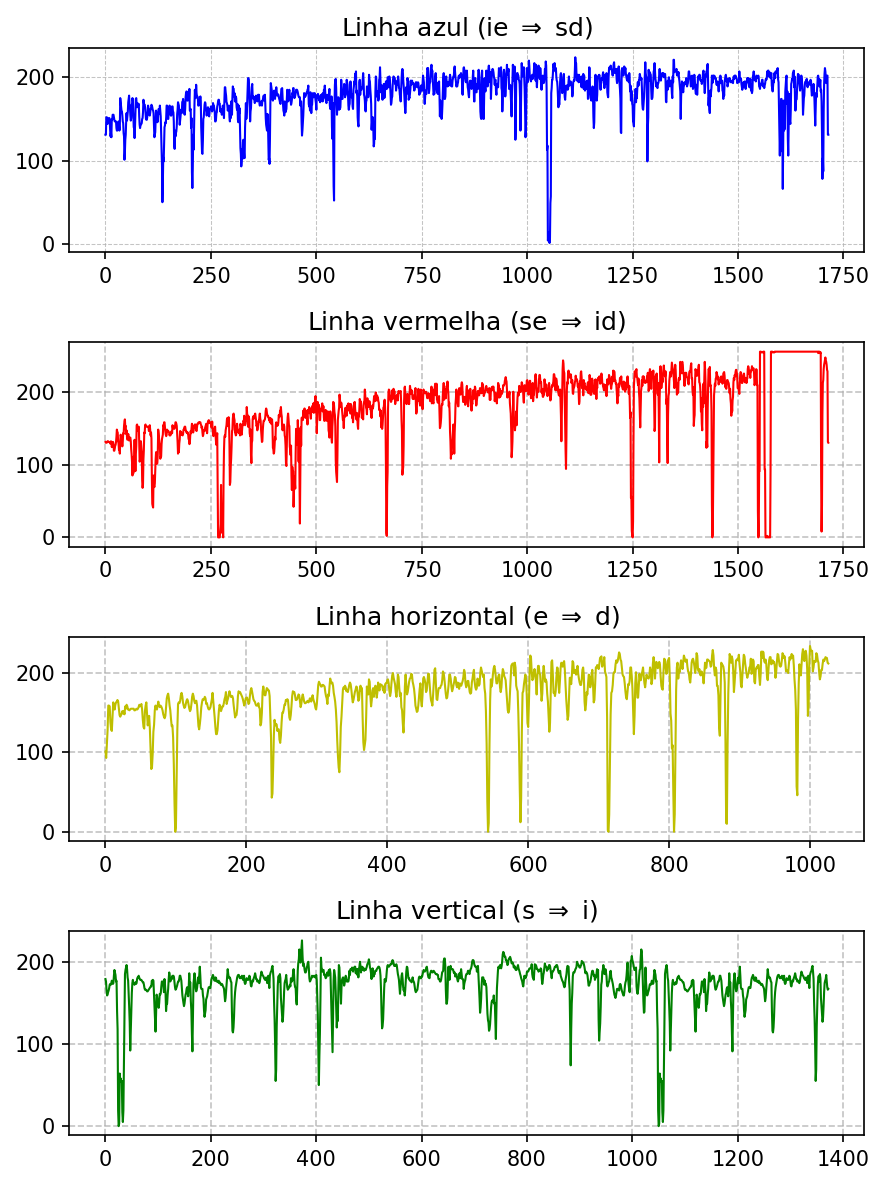

In [8]:
#plota os perfis de linha
plt.figure(5, figsize=(6, 8), dpi=150, constrained_layout=False)

plt.subplot(411)
plt.plot(lzl1,linewidth=1,c="b")
plt.title('Linha azul (ie $\Rightarrow$ sd)')
plt.tight_layout()
plt.grid(alpha=0.75,linestyle='--',linewidth=0.5)

plt.subplot(412)
plt.plot(lzl2,linewidth=1,c="r")
plt.title('Linha vermelha (se $\Rightarrow$ id)')
plt.tight_layout()
plt.grid(alpha=0.75,linestyle='--')

plt.subplot(413)
plt.plot(lzl4,linewidth=1,c="y")
plt.title('Linha horizontal (e $\Rightarrow$ d)')
plt.tight_layout()
plt.grid(alpha=0.75,linestyle='--')

plt.subplot(414)
plt.plot(lzl3,linewidth=1,c="g")
plt.title('Linha vertical (s $\Rightarrow$ i)')
plt.tight_layout()
plt.grid(alpha=0.75,linestyle='--')

plt.show()


### Aplica-se o filtro de Gaussian blur à imagem

Obs: o tamanho do Kernel deve ser **ÍMPAR**!

In [9]:
#tamanho do kernel (k x k)
ker = 801
#faz a mediana da imagem
blur_cinza = cv2.GaussianBlur(cinza,(ker,ker),0)
#determina o histograma
blur_histograma = cv2.calcHist([blur_cinza],[0],None,[256], [0,256])

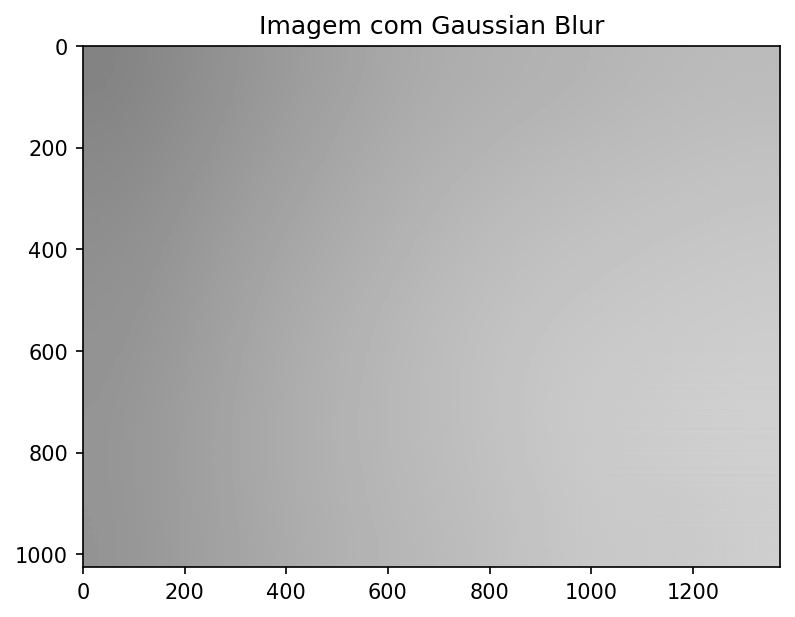

In [10]:
#mostra a imagem
plt.figure(6, figsize=(6,6),dpi=150)
plt.imshow(blur_cinza, cmap='gray',vmin=0, vmax=255)
plt.title('Imagem com Gaussian Blur')
plt.show()

### Faz-se a diferença entre as imagens

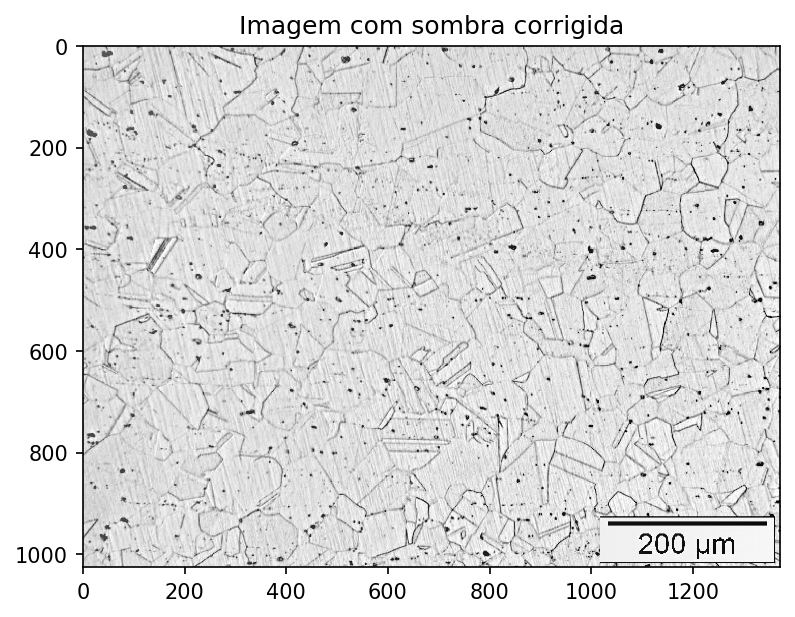

In [11]:
#diferença entre as imagens
ajuste=40
diff_img = 255 - cv2.absdiff(cinza, (blur_cinza+ajuste))

#plota a figura
plt.figure(7, figsize=(6,6),dpi=150)
plt.imshow(diff_img, cmap='gray',vmin=0, vmax=255)
plt.title('Imagem com sombra corrigida')
plt.show()

### Constrói-se o histograma com escala linear e log da imagem em tons de cinza da imagem modificada com o filtro

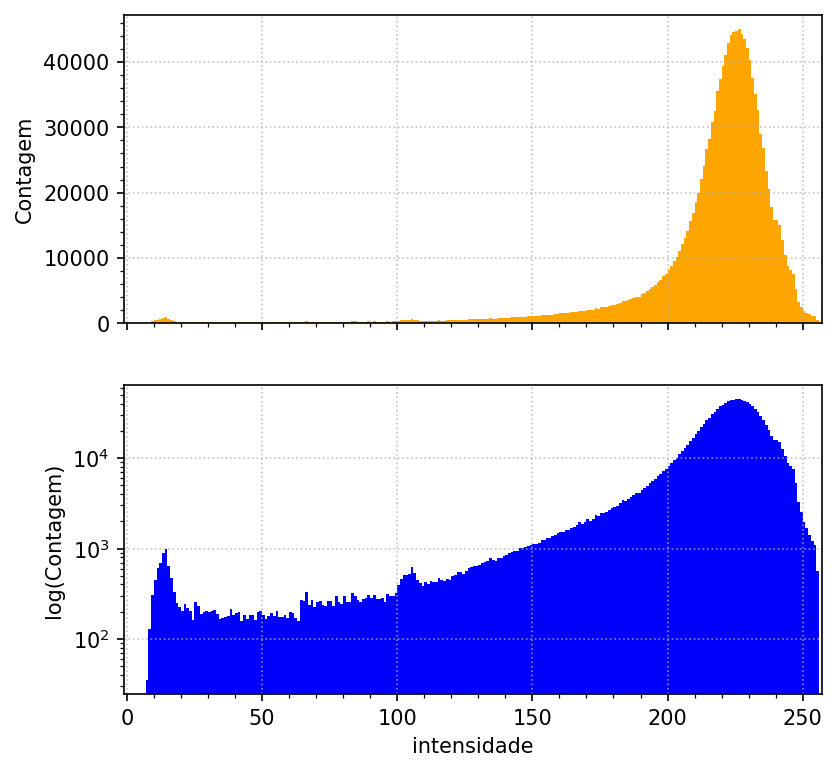

In [12]:
#mostra o histograma normal e log
plt.figure(7, figsize=(6, 6), dpi=150)
#hostograma normal
plt.subplot(211)
plt.hist(diff_img.ravel(),256,[0,256],color = 'orange')
plt.xlim(-1, 257)
plt.ylabel('Contagem')
plt.minorticks_on()
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.grid(alpha=0.75,linestyle=':')

#histograma log
plt.subplot(212)
plt.hist(diff_img.ravel(),256,[0,256],color = 'blue')
plt.yscale('log')
plt.xlim(-1, 257)
plt.ylabel('log(Contagem)')
plt.xlabel('intensidade')
plt.minorticks_on()
plt.grid(alpha=0.75,linestyle=':')
plt.show()

In [13]:
#estabelece as linhas
dlzl1 = profile_line(diff_img,ie, sd,linewidth=1,order=0,mode='wrap') #linha azul
dlzl2 = profile_line(diff_img,se, id,linewidth=1,order=0,mode='wrap') #linha vermelha
dlzl3 = profile_line(diff_img,(0,int(ydim/2)), (xdim,int(ydim/2)),linewidth=1,order=0,mode='wrap') #linha horizontal
dlzl4 = profile_line(diff_img,(int(xdim/2),0), (int(xdim/2),ydim),linewidth=1,order=0,mode='wrap') #linha vertical

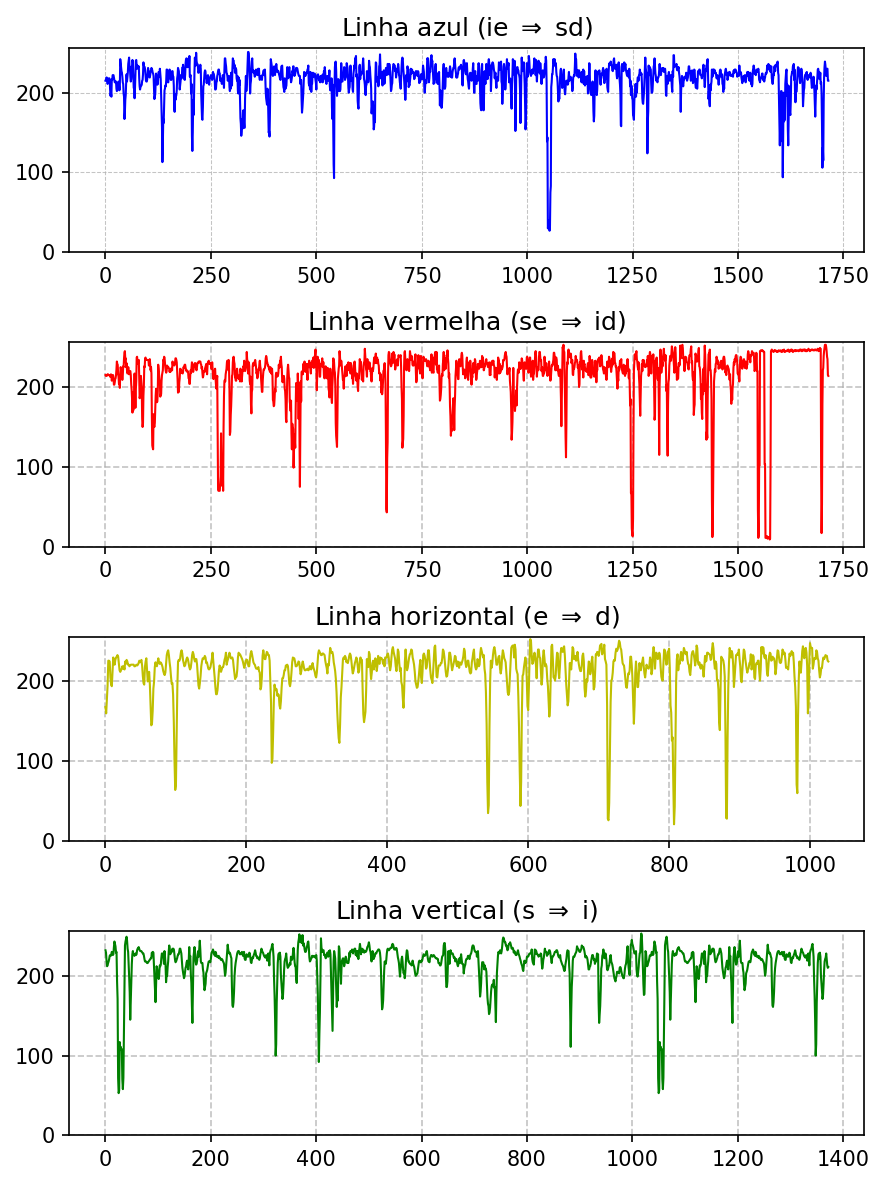

In [14]:
#plota os perfis de linha
plt.figure(9, figsize=(6, 8), dpi=150, constrained_layout=False)

plt.subplot(411)
plt.plot(dlzl1,linewidth=1,c="b")
plt.title('Linha azul (ie $\Rightarrow$ sd)')
plt.tight_layout()
plt.ylim(0,256)
plt.grid(alpha=0.75,linestyle='--',linewidth=0.5)

plt.subplot(412)
plt.plot(dlzl2,linewidth=1,c="r")
plt.title('Linha vermelha (se $\Rightarrow$ id)')
plt.tight_layout()
plt.ylim(0,256)
plt.grid(alpha=0.75,linestyle='--')

plt.subplot(413)
plt.plot(dlzl4,linewidth=1,c="y")
plt.title('Linha horizontal (e $\Rightarrow$ d)')
plt.tight_layout()
plt.ylim(0,256)
plt.grid(alpha=0.75,linestyle='--')

plt.subplot(414)
plt.plot(dlzl3,linewidth=1,c="g")
plt.title('Linha vertical (s $\Rightarrow$ i)')
plt.tight_layout()
plt.ylim(0,256)
plt.grid(alpha=0.75,linestyle='--')

plt.show()

### Compara as suas figuras

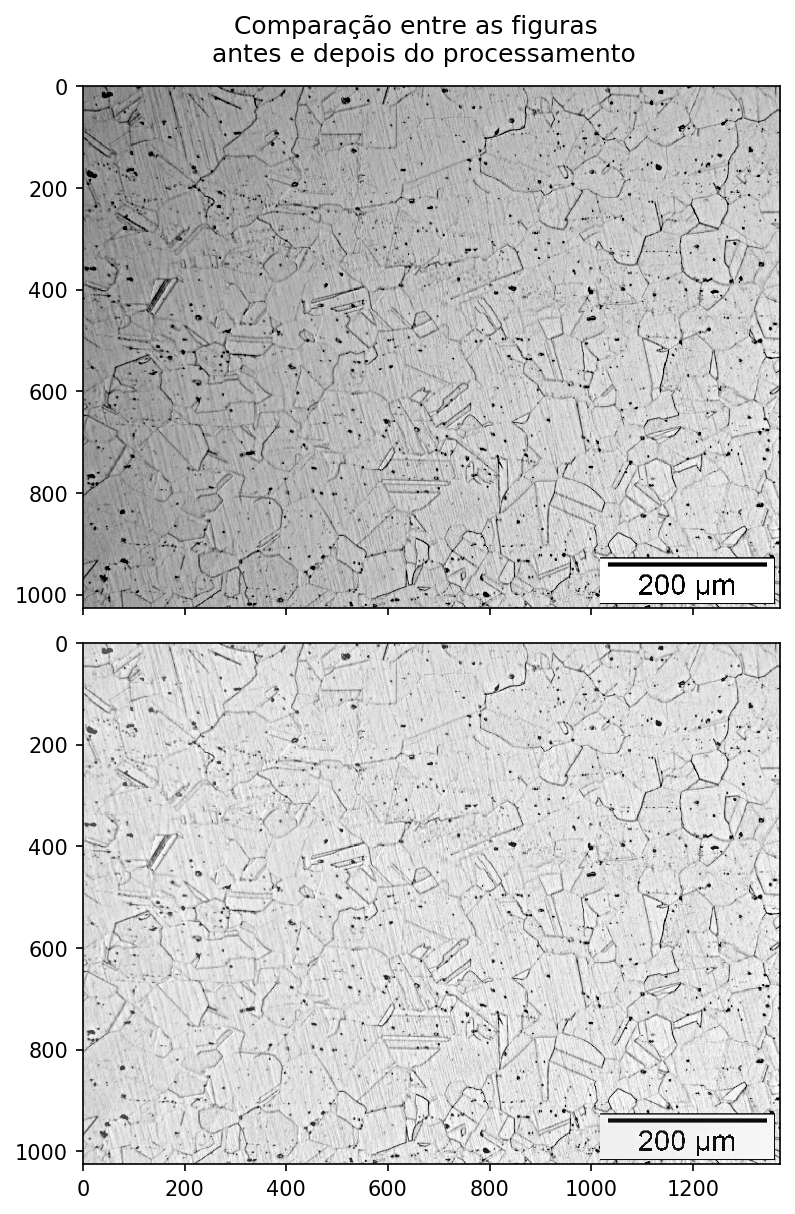

In [15]:
#plota as duas figuras conjutamente e lado a lado
fig,axs=plt.subplots(2,figsize=(6, 9), dpi=150, sharex=True, sharey=True)
fig.subplots_adjust(wspace=0, hspace=0.05,top=0.93)
fig.suptitle("Comparação entre as figuras \n antes e depois do processamento")
axs[0].imshow(cinza, cmap='gray',vmin=0, vmax=255)
axs[1].imshow(diff_img, cmap='gray',vmin=0, vmax=255)
for ax in axs.flat:
    ax.label_outer()
plt.show()